In [1]:
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir('morphologies/')

savedata = 1 # Save Netpyne and BBP soma_voltage

/home/fernando/Dropbox/Extracellular_stimulation_NetPyNE/test/L23Net


In [2]:
folder = [fldr[0:-4] for fldr in folder]
folder

['HL23PYR', 'HL23VIP', 'HL23PV', 'HL23SST']

In [3]:
# !nrnivmodl mod/

In [4]:
from netpyne import sim, specs
import pickle

cfg = specs.SimConfig()     

cfg.duration = 320 ## Duration of the sim, in ms  
cfg.dt = 0.05
cfg.seeds = {'conn': 4321, 'stim': 1234, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -70}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.5

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

allpops = ['HL23PYR', 'HL23VIP', 'HL23PV', 'HL23SST']

cfg.recordCells = allpops  # which cells to record from
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    # 'V_axon_10': {'sec':'axon_10', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_3': {'sec':'apic_3', 'loc':0.5, 'var':'v'},
                    # 'V_apic_13': {'sec':'apic_13', 'loc':0.5, 'var':'v'},
                    # 'V_apic_100': {'sec':'apic_100', 'loc':0.5, 'var':'v'},
                    # 'V_dend_8_1': {'sec':'dend_8', 'loc':0.1, 'var':'v'},
                    # 'V_dend_8_3': {'sec':'dend_8', 'loc':0.3, 'var':'v'},
                    # 'V_dend_8_5': {'sec':'dend_8', 'loc':0.5, 'var':'v'},
                    # 'V_dend_8_7': {'sec':'dend_8', 'loc':0.7, 'var':'v'},
                    # 'V_dend_8_9': {'sec':'dend_8', 'loc':0.9, 'var':'v'},                    
                    'V_dend_5': {'sec':'dend_5', 'loc':0.5, 'var':'v'},
                    # 'V_dend_25': {'sec':'dend_25', 'loc':0.5, 'var':'v'},
                    # 'V_dend_70': {'sec':'dend_70', 'loc':0.5, 'var':'v'},
                    }


## Dict with traces to record
cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.05         


cfg.recordLFP = [[0, y, 0] for y in [-400]] # 1 elec on skull


cfg.simLabel = 'S1_Net'
cfg.saveFolder = '.'
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False           	## Save json file
cfg.saveDataInclude = ['simConfig', 'netParams'] ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None 		##  
cfg.gatherOnlySimData = False	##  
cfg.saveCellSecs = True			##  
cfg.saveCellConns = False		##  

cfg.analysis['plotTraces'] = {'include': allpops, 'figSize': (12, 4), 'timeRange': [180,cfg.duration], 'saveFig': False, 'overlay': True, 'oneFigPer': 'cell'}  # Plot recorded traces for this list of cells


#------------------------------------------------------------------------------
# Current inputs 
#------------------------------------------------------------------------------
cfg.addIClamp = 1

cfg.IClamp1 = {'pop': 'HL23PYR',  'sec': 'soma_0', 'loc': 0.5, 'start': 1000, 'dur': 1000, 'amp': 0.2}
cfg.IClamp2 = {'pop': 'HL23VIP', 'sec': 'soma_0', 'loc': 0.5, 'start': 700, 'dur': 25, 'amp': 0.2}
cfg.IClamp3 = {'pop': 'HL23PV', 'sec': 'soma_0', 'loc': 0.5, 'start': 900, 'dur': 25, 'amp': 0.2}
cfg.IClamp4 = {'pop': 'HL23SST', 'sec': 'soma_0', 'loc': 0.5, 'start': 1100, 'dur': 25, 'amp': 0.2}



In [5]:

#------------------------------------------------------------------------------
#
# NETWORK PARAMETERS
#
#------------------------------------------------------------------------------
netParams = specs.NetParams()   # object of class NetParams to store the network parameters
#------------------------------------------------------------------------------
# General network parameters
#------------------------------------------------------------------------------
cfg.scale = 1.0 # reduce size
cfg.sizeY = 2082.0
cfg.sizeX = 420.0 # r = 210 um
cfg.sizeZ = 420.0

netParams.scale = cfg.scale # Scale factor for number of cells
netParams.sizeX = cfg.sizeX # x-dimension (horizontal length) size in um
netParams.sizeY = cfg.sizeY # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = cfg.sizeZ # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume
   
# Layer	height (um)	height (norma)	from	to
# L1	165		    0.079		    0.000	0.079
# L2	149		    0.072		    0.079	0.151
# L3	353		    0.170		    0.151	0.320
# L4	190		    0.091		    0.320	0.412
# L5	525		    0.252		    0.412	0.664
# L6	700		    0.336		    0.664	1.000
# L23	502		    0.241		    0.079	0.320
# All	2082	    1.000	


cellModels = ['HH_full']

layer = {'1':[0.0, 0.079], '2': [0.079,0.151], '3': [0.151,0.320], '23': [0.079,0.320], '4':[0.320,0.412], '5': [0.412,0.664], '6': [0.664,1.0], 
'longS1': [2.2,2.3], 'longS2': [2.3,2.4]}  # normalized layer boundaries

#------------------------------------------------------------------------------
# Cell parameters
#------------------------------------------------------------------------------

for cellName in allpops:
    cellRule = netParams.importCellParams(label=cellName + '_rule', somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell_' + cellName,
        cellInstance = True,
        cellArgs={'cellName': cellName})



NeuronTemplate_HL23PYR[0]
NeuronTemplate_HL23VIP[0]
NeuronTemplate_HL23PV[0]
NeuronTemplate_HL23SST[0]


In [6]:
#------------------------------------------------------------------------------
# Cell parameters 
#------------------------------------------------------------------------------

for cellName in netParams.cellParams.keys():
        
        axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['soma_0']['geom']['pt3d'][-1]
        axon_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['diam']
        axon_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'] = [(axon_pt3d_x, axon_pt3d_y, axon_pt3d_z, axon_pt3d_diam),
                                                                          (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L/2.0, axon_pt3d_z, axon_pt3d_diam),
                                                                          (axon_pt3d_x, axon_pt3d_y+axon_pt3d_L, axon_pt3d_z, axon_pt3d_diam)]

        axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_0']['geom']['pt3d'][-1]
        axon1_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['diam']
        axon1_pt3d_L =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['L']

        netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'] = [(axon1_pt3d_x, axon1_pt3d_y, axon1_pt3d_z, axon1_pt3d_diam),
                                                                          (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L/2.0, axon1_pt3d_z, axon1_pt3d_diam),
                                                                          (axon1_pt3d_x, axon1_pt3d_y+axon1_pt3d_L, axon1_pt3d_z, axon1_pt3d_diam)] 
        
        if 'myelin_0' in netParams.cellParams[cellName]['secs'].keys():

                if 'myelin_0' not in netParams.cellParams[cellName]['secLists']['all']:
                        netParams.cellParams[cellName]['secLists']['all'].append('myelin_0')

                if 'myelin_0' not in netParams.cellParams[cellName]['secLists']['axonal']:                        
                        netParams.cellParams[cellName]['secLists']['axonal'].append('myelin_0')

                myelin0_pt3d_x, myelin0_pt3d_y, myelin0_pt3d_z, soma_pt3d_diam =  netParams.cellParams[cellName]['secs']['axon_1']['geom']['pt3d'][-1]
                myelin0_pt3d_diam =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['diam']
                myelin0_pt3d_L =  netParams.cellParams[cellName]['secs']['myelin_0']['geom']['L']

                netParams.cellParams[cellName]['secs']['myelin_0']['geom']['pt3d'] = [(myelin0_pt3d_x, myelin0_pt3d_y, myelin0_pt3d_z, myelin0_pt3d_diam),
                                                                                (myelin0_pt3d_x, myelin0_pt3d_y+myelin0_pt3d_L/2.0, myelin0_pt3d_z, myelin0_pt3d_diam),
                                                                                (myelin0_pt3d_x, myelin0_pt3d_y+myelin0_pt3d_L, myelin0_pt3d_z, myelin0_pt3d_diam)] 
        

In [7]:
for cellName in netParams.cellParams.keys():

    netParams.renameCellParamsSec(label=cellName, oldSec='myelin_0', newSec='axon_2')      
           
    for secname2 in netParams.cellParams[cellName]['secLists'].keys():
     if 'myelin_0' in netParams.cellParams[cellName]['secLists'][secname2]:
       print('old ->',cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][-1])
       netParams.cellParams[cellName]['secLists'][secname2][-1] = 'axon_2'    
       print('new ->',cellName,secname2,netParams.cellParams[cellName]['secLists'][secname2][-1])



old -> HL23PYR_rule all myelin_0
new -> HL23PYR_rule all axon_2
old -> HL23PYR_rule axonal myelin_0
new -> HL23PYR_rule axonal axon_2
old -> HL23SST_rule all myelin_0
new -> HL23SST_rule all axon_2
old -> HL23SST_rule axonal myelin_0
new -> HL23SST_rule axonal axon_2


In [8]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------

for cellName in allpops:
    netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1} 

# #------------------------------------------------------------------------------
# #  extracellular mechs
# #------------------------------------------------------------------------------
for celltyp in netParams.cellParams.keys():
    label = []
    for secname in netParams.cellParams[celltyp]['secs'].keys():
        netParams.cellParams[celltyp]['secs'][secname]['mechs']['extracellular'] = {}

#------------------------------------------------------------------------------
# Current inputs (IClamp)
#------------------------------------------------------------------------------
if cfg.addIClamp:
     for key in [k for k in dir(cfg) if k.startswith('IClamp')]:
        params = getattr(cfg, key, None)
        [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

        #cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

        # add stim source
        netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

        # connect stim source to target
        netParams.stimTargetParams[key+'_'+pop] =  {
            'source': key, 
            'conds': {'pop': pop},
            'sec': sec, 
            'loc': loc}

        
# netParams.rotateCellsRandomly = True
# sim.createSimulateAnalyze(netParams, cfg)     

In [9]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.defineCellShapes()  # in case some cells had stylized morphologies without 3d pts
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2024-06-19 14:08:49.776127

Creating network of 4 cell populations on 1 hosts...
  Number of cells on node 0: 4 
  Done; cell creation time = 0.12 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 4 
  Done; cell stims creation time = 0.00 s.
Recording 16 traces of 4 types on node 0


{spkt: Vector[0], spkid: Vector[1], stims: {cell_0: {}, cell_1: {}, cell_2: {}, cell_3: {}}, V_soma: {cell_0: Vector[14], cell_1: Vector[17], cell_2: Vector[20], cell_3: Vector[23]}, V_axon_0: {cell_0: Vector[15], cell_1: Vector[18], cell_2: Vector[21], cell_3: Vector[24]}, V_dend_5: {cell_0: Vector[16], cell_1: Vector[19], cell_2: Vector[22], cell_3: Vector[25]}, t: Vector[26], LFP: array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), _repr_mimebundle_: {}}

In [10]:
# for sec in netParams.cellParams[celltyp]['secLists']['all']:
#     if netParams.cellParams[celltyp]['secs'][sec]['geom']['nseg']>1:
#         print(sec,netParams.cellParams[celltyp]['secs'][sec]['geom']['nseg'],np.shape(netParams.cellParams[celltyp]['secs'][sec]['geom']['pt3d']))


 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.65048060320456, 'ynorm': 0.7647656351875594, 'znorm': 0.42104209446381713, 'x': 273.2018533459152, 'y': 1592.2420524604986, 'z': 176.83767967480318}
['soma_0', 'dend_0', 'dend_1', 'dend_2', 'dend_3', 'dend_4', 'dend_5', 'dend_6', 'dend_7', 'dend_8', 'dend_9', 'dend_10', 'dend_11', 'dend_12', 'dend_13', 'dend_14', 'dend_15', 'dend_16', 'dend_17', 'dend_18', 'dend_19', 'dend_20', 'dend_21', 'dend_22', 'dend_23', 'dend_24', 'dend_25', 'dend_26', 'dend_27', 'dend_28', 'dend_29', 'apic_0', 'apic_1', 'apic_2', 'apic_3', 'apic_4', 'apic_5', 'apic_6', 'apic_7', 'apic_8', 'apic_9', 'apic_10', 'apic_11', 'apic_12', 'apic_13', 'apic_14', 'apic_15', 'apic_16', 'apic_17', 'apic_18', 'apic_19', 'apic_20', 'apic_21', 'apic_22', 'apic_23', 'apic_24', 'apic_25', 'apic_26', 'apic_27', 'apic_28', 'apic_29', 'apic_30', 'apic_31', 'apic_32', 'apic_33', 'apic_34', 'apic_35', 'apic_36', 'apic_37', 'apic_38', 'apic_39', 'apic_40', 

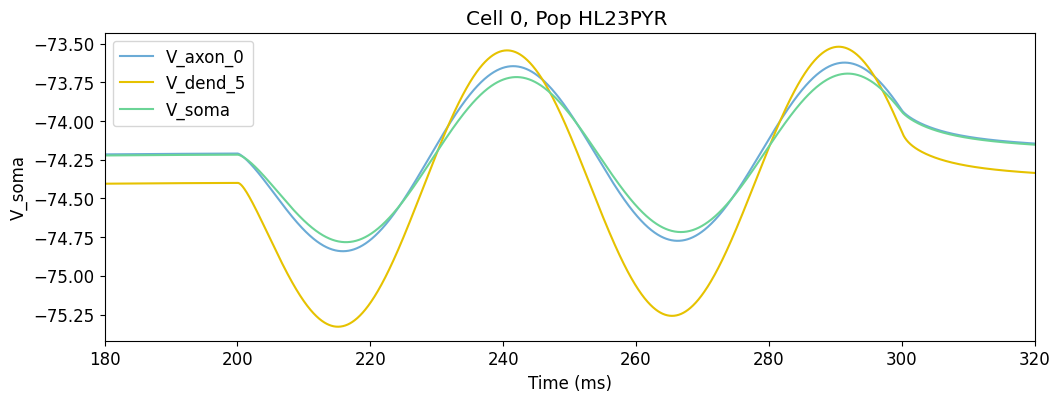

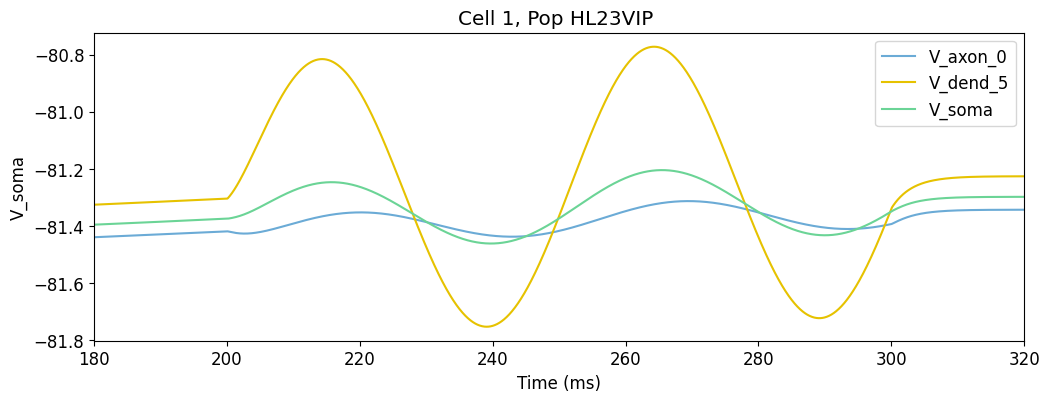

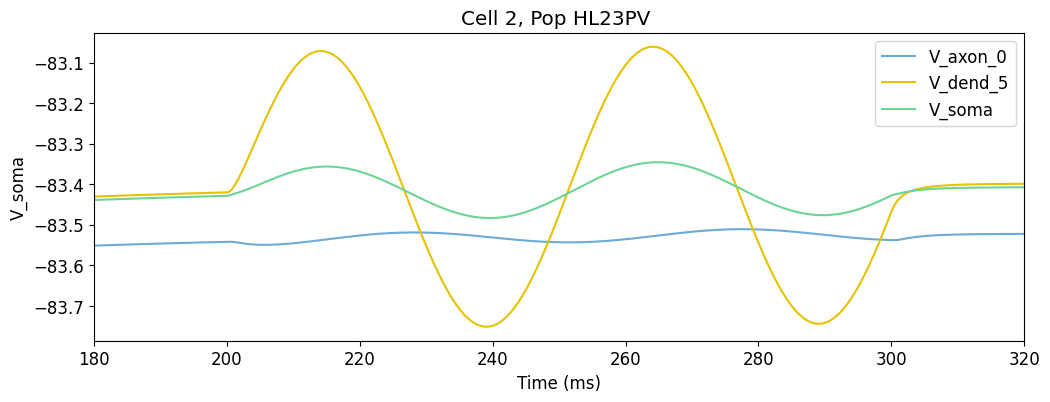

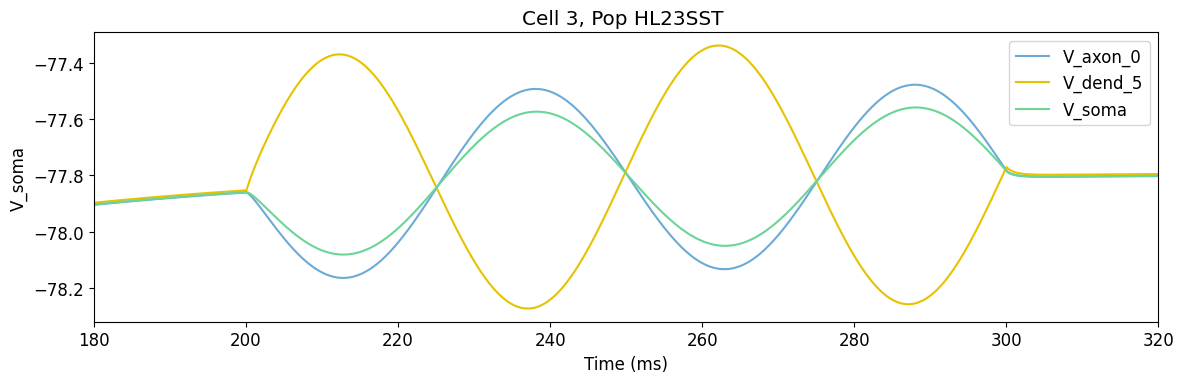

  Done; plotting time = 0.75 s

Total time = 31.11 s
Plotting 3D cell shape ...


(<Figure size 640x480 with 1 Axes>, {})

In [11]:
def collect_pt3d(self, section):
        """        collect the pt3d info, for each section
        """
        n3dsec = 0
        r3dsec = np.zeros(3)
        for sec in [sec for secName, sec in self.secs.items() if section in secName]:
            sec['hObj'].push()
            n3d = int(neuron.h.n3d())  # get number of n3d points in each section
            # print("get number of n3d points in each section",n3d)
            r3d = np.zeros((3, n3d))  # to hold locations of 3D morphology for the current section
            n3dsec += n3d

            for i in range(n3d):
                r3dsec[0] += neuron.h.x3d(i)
                r3dsec[1] += neuron.h.y3d(i)
                r3dsec[2] += neuron.h.z3d(i)
            
            neuron.h.pop_section()

        r3dsec /= n3dsec
        
        return r3dsec
    
def getSecsPos(self, secList):
        """        Get Secs position
        """
        x3d, y3d, z3d = [], [], []
        
        for secName in secList:
            # print(secName)
            r3dsec = collect_pt3d(self, secName)
            # print(secName, r3dsec)
            
            x3d.append(r3dsec[0])
            y3d.append(r3dsec[1])
            z3d.append(r3dsec[2])
            
        return x3d, y3d, z3d
    
def insert_v_ext(self, v_ext, t_ext):

    self.t_ext = neuron.h.Vector(t_ext)
    self.v_ext = []
    for v in v_ext:
        self.v_ext.append(neuron.h.Vector(v))
    
    # play v_ext into e_extracellular reference
    i = 0
    for secName, sec in self.secs.items(): 
        # print(secName,i)
        for seg in sec['hObj']:
                self.v_ext[i].play(seg._ref_e_extracellular, self.t_ext)
        i += 1
  
def make_extracellular_stimuli(acs_params, self, secList):
    """ Function to calculate and apply external potential """
    x0, y0, z0 = acs_params['position']
    ext_field = np.vectorize(lambda x, y, z: 1 / (4 * np.pi *
                            (acs_params['sigma'] * 
                            np.sqrt((x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2) + skull_attenuation)))

    stimstart = acs_params['stimstart']
    stimend = acs_params['stimend']
    stimdif = stimend-stimstart

    # MAKING THE EXTERNAL FIELD
    n_tsteps = int(stimdif / cfg.dt + 1)
    n_start = int(stimstart/cfg.dt)
    n_end = int(stimend/cfg.dt + 1)
    t = np.arange(start=n_start, stop=n_end) * cfg.dt
    pulse = acs_params['amp'] * 1000. * \
        np.sin(2 * np.pi * acs_params['frequency'] * t / 1000)

    totnsegs = len(secList)    
    v_cell_ext = np.zeros((totnsegs, n_tsteps))    
    v_cell_ext[:, :] = ext_field(getSecsPos(metype,secList)[0], -1*np.array(getSecsPos(metype, secList)[1]), 
                                 getSecsPos(metype,secList)[2]).reshape(totnsegs, 1) * pulse.reshape(1, n_tsteps)
    
    insert_v_ext(self, v_cell_ext, t)

    return v_cell_ext, self


# The parameters of the extracellular point current source
acs_params = {'position': [210.0, -1710.0, 210.0],  # um # y = [pia, bone]
              'amp': 400.,  # uA,
              'stimstart': 200,  # ms
              'stimend': 300,  # ms
              'frequency': 20,  # Hz
              'sigma': 0.57  # decay constant S/m
              }

skull_attenuation = 0.01*710 #conductivity of bone(S/m) * thickness of rat skull um

#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        print(secList)
        v_cell_ext, cell = make_extracellular_stimuli(acs_params, metype,secList)


sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc
sim.analysis.plotShape()  

(59, 2001)


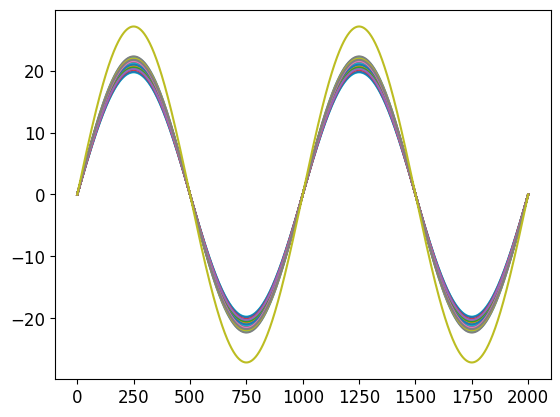

In [12]:
print(np.shape(v_cell_ext))
for v in v_cell_ext:
    plt.plot(v)


 {'cellType': 'HL23PYR', 'cellModel': 'HH_full', 'pop': 'HL23PYR', 'xnorm': 0.65048060320456, 'ynorm': 0.7647656351875594, 'znorm': 0.42104209446381713, 'x': 273.2018533459152, 'y': 1592.2420524604986, 'z': 176.83767967480318}

 {'cellType': 'HL23VIP', 'cellModel': 'HH_full', 'pop': 'HL23VIP', 'xnorm': 0.80225897938126, 'ynorm': 0.817810338498603, 'znorm': 0.10644638304556076, 'x': 336.9487713401292, 'y': 1702.6811247540913, 'z': 44.70748087913552}

 {'cellType': 'HL23PV', 'cellModel': 'HH_full', 'pop': 'HL23PV', 'xnorm': 0.7828228870332057, 'ynorm': 0.8786818525105059, 'znorm': 0.2562375803977795, 'x': 328.7856125539464, 'y': 1829.4156169268733, 'z': 107.61978376706739}

 {'cellType': 'HL23SST', 'cellModel': 'HH_full', 'pop': 'HL23SST', 'xnorm': 0.4594527259586399, 'ynorm': 0.884100548018678, 'znorm': 0.8929340638393198, 'x': 192.97014490262876, 'y': 1840.6973409748875, 'z': 375.0323068125143}


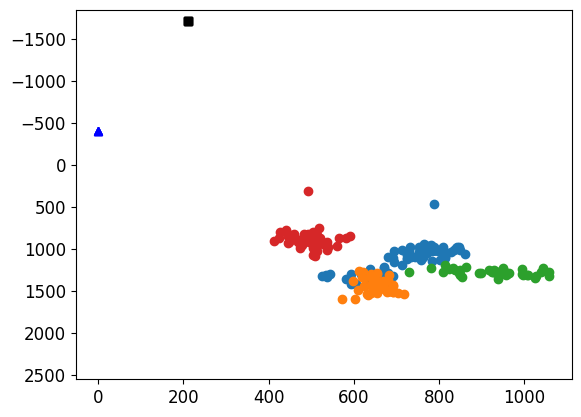

In [13]:
#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        plt.plot(0,-400,'b^')
        plt.plot(acs_params['position'][0],acs_params['position'][1],'ks')
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        plt.plot(np.array(getSecsPos(metype, secList)[0]),-1*np.array(getSecsPos(metype, secList)[1]),'o')
        plt.ylim(2550,-1850)
        # print(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),np.array(getSecsPos(cell, secList)[2]).mean(axis=-1))

Plotting LFP electrode locations...
Plotting 3D cell shape ...
Preparing LFP data...
Plotting LFP time series...


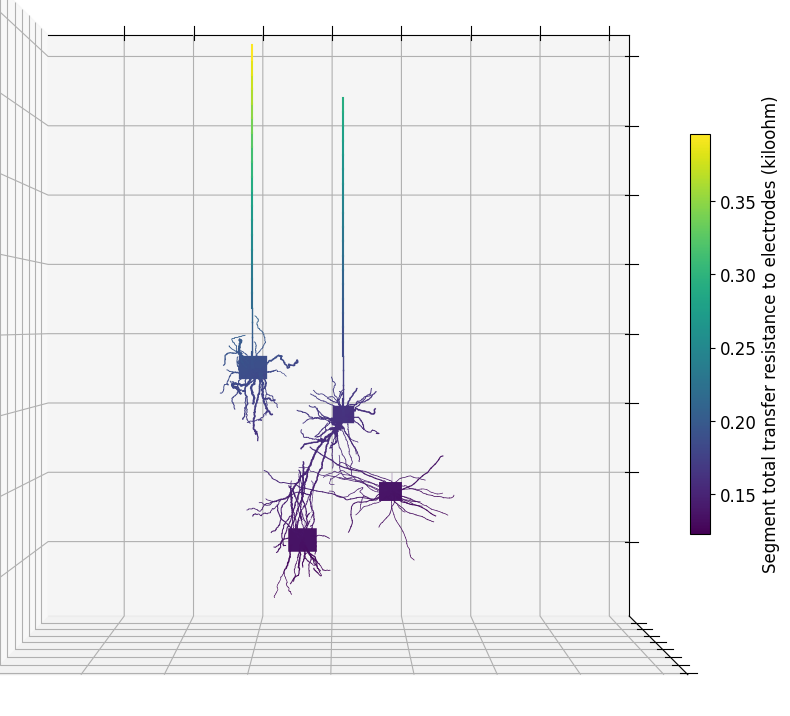

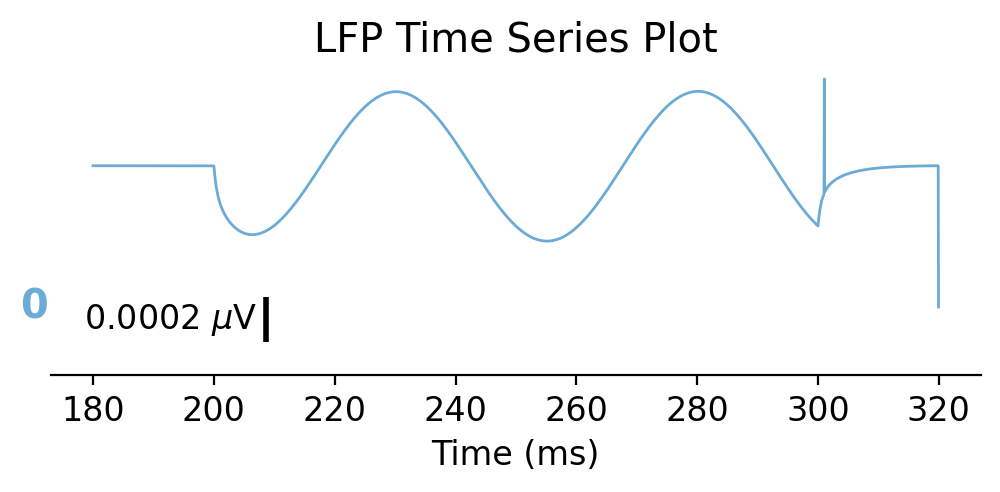

In [14]:
sim.analysis.plotLFP(**{'plots': ['locations'], 
        'figSize': (8,8), 
        'saveData': False, 
        'saveFig': False, 'showFig': False, 'dpi': 100})

sim.analysis.plotLFP(**{'plots': ['timeSeries'], 
        'electrodes': [0], #'avg', 
        'timeRange': [180, cfg.duration], 
        'figSize': (6,2), 'saveFig': False, 'showFig': False})

In [43]:
list(sim.simData['V_soma'].keys())[0]


'cell_0'

Plotting 3D cell shape ...


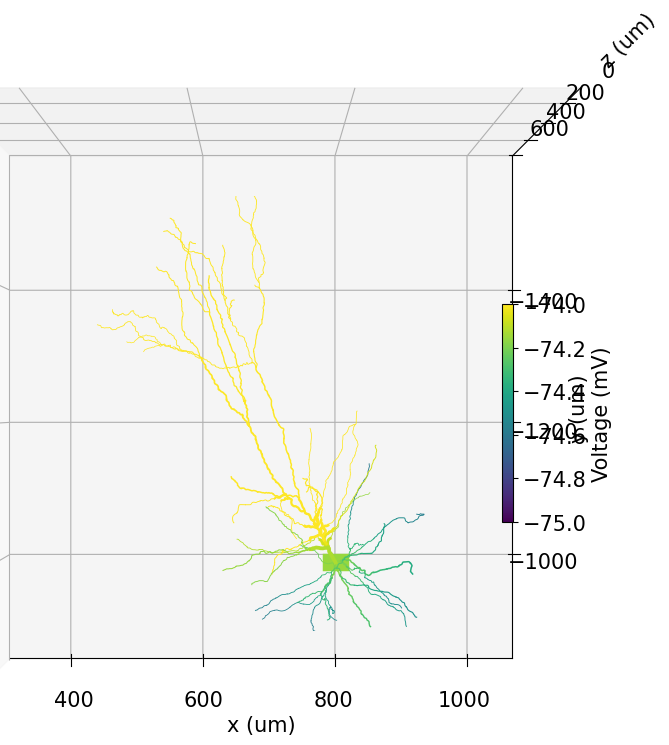

In [52]:
# for cn,cell_name in enumerate(['HL23PYR', 'HL23VIP', 'HL23PV', 'HL23SST']):      
for cn,cell_name in enumerate(['HL23PYR']):               

    sim.analysis.plotShape(includePre=[cell_name], includePost=[cell_name], includeAxon=False, showSyns=False, showElectrodes=False,
        cvar= 'voltage', dist=0.46, elev=270, azim=-90, 
        axisLabels=True, synStyle='o', 
        clim= [-75,-74], showFig=False, synSize=2)

Plotting recorded cell traces ... trace


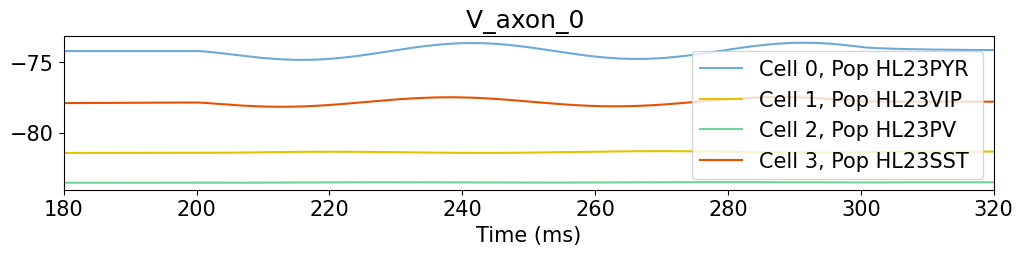

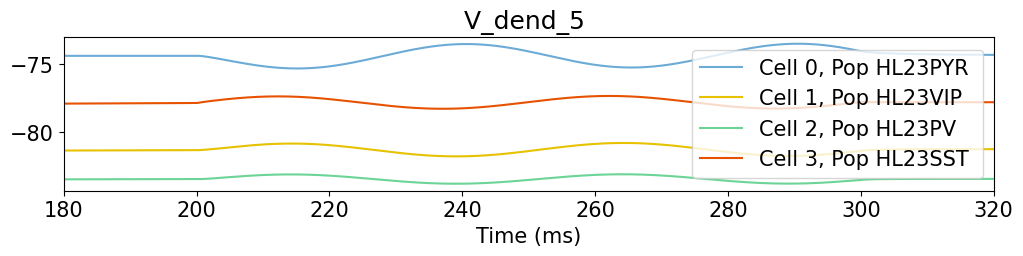

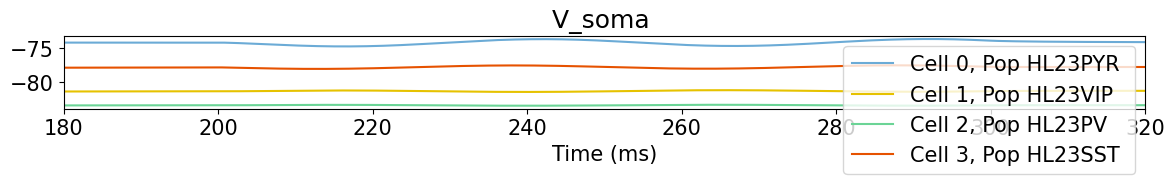

In [16]:
sim.analysis.plotTraces(overlay=True, timeRange=[180,cfg.duration], oneFigPer='trace', figSize=(12,2), fontSize=15, saveFig=False);

In [22]:
# for section in netParams.cellParams['HL23PYR_rule']['secLists']['all']:
#     print(section,'->',netParams.cellParams['HL23PYR_rule']['secs'][section]['topol']['parentSec'])
#     print(section,netParams.cellParams['HL23PYR_rule']['secs'][section]['geom']['diam'],netParams.cellParams['HL23PYR_rule']['secs'][section]['geom']['L'])

Plotting 2D representation of network cell locations and connections...


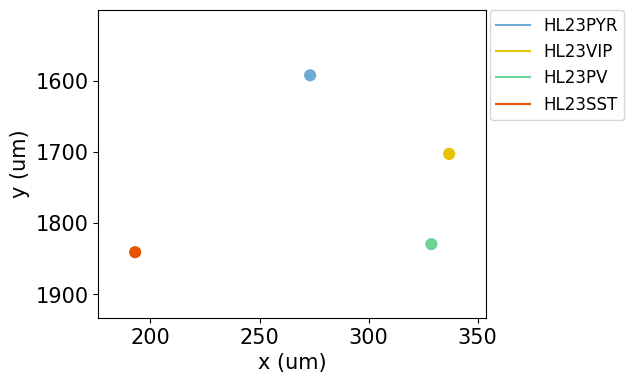

(<Figure size 500x400 with 1 Axes>,
 {'include': ['allCells'],
  'posX': [273.2018533459152,
   336.9487713401292,
   328.7856125539464,
   192.97014490262876],
  'posY': [1592.2420524604986,
   1702.6811247540913,
   1829.4156169268733,
   1840.6973409748875],
  'posXpre': [],
  'posXpost': [],
  'posYpre': [],
  'posYpost': []})

In [20]:
sim.analysis.plot2Dnet(figSize=(5, 4), fontSize=12)